In [34]:
#Credit Card Fraud Prediction
##Importing libraries and functions: First we need to import all the funcionts and libraries that we are going to use

from pandas.io.parsers.readers import read_csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
#Now we are going to import the data base
data_base = pd.read_csv('/kaggle/input/credit-card-fraud/data/creditcard_csv.csv')

In [36]:
#Now we are going to make some data exploration
print(data_base.head(10))

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
5   2.0 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728  0.476201   
6   4.0  1.229658  0.141004  0.045371  1.202613  0.191881  0.272708 -0.005159   
7   7.0 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118  1.120631   
8   7.0 -0.894286  0.286157 -0.113192 -0.271526  2.669599  3.721818  0.370145   
9   9.0 -0.338262  1.119593  1.044367 -0.222187  0.499361 -0.246761  0.651583   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -

In [37]:
#Now we need to check the datatypes that we have in our dataset
print(data_base.dtypes)

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class      object
dtype: object


In [38]:
#Now we need to check the summarie of the data
print(data_base.describe(include = "all"))

                 Time            V1            V2            V3            V4  \
count   284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
unique            NaN           NaN           NaN           NaN           NaN   
top               NaN           NaN           NaN           NaN           NaN   
freq              NaN           NaN           NaN           NaN           NaN   
mean     94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std      47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min          0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%      54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%      84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%     139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max     172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                  V5       

In [39]:
#Now lets check if we have any missing value
data_base.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [40]:
#We don't have any missing value so now let's explore our Class feature.
data_base.Class.value_counts()

'0'    284315
'1'       492
Name: Class, dtype: int64

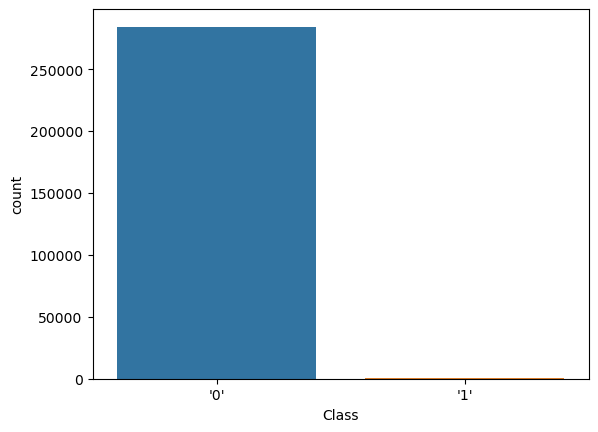

In [41]:
#Let's make a visualization for this feature
sns.countplot(data= data_base, x="Class")
plt.show() #We can see that the data is very unbalanced and it could be interesting to make more analysis about this but this time we are going to work with the info that we have.

In [42]:
data_base['Class'].isnull().sum()

0

In [43]:
data_base['Class'].unique()

array(["'0'", "'1'"], dtype=object)

In [44]:
#Now let's change the data type from Class Feature and remove the '\' to be able to change the datatype
data_base['Class'] = data_base['Class'].str.strip('\'').map({'1': 1, '0': 0}).astype(int)
print(data_base.dtypes)

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


In [45]:
#Now lets check if we have any missing value
data_base.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [48]:
#Now that we have made the transformation we could make our model but first let's import our libraries
#Import functions to compute accuracy
from sklearn.metrics import accuracy_score

#Import models, model selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.preprocessing import StandardScaler

In [49]:
# Set seed for reproducibility
SEED = 42

In [50]:
#Now we need to split the data
X = data_base.drop("Class", axis=1).values
y = data_base["Class"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=SEED, test_size=0.2)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

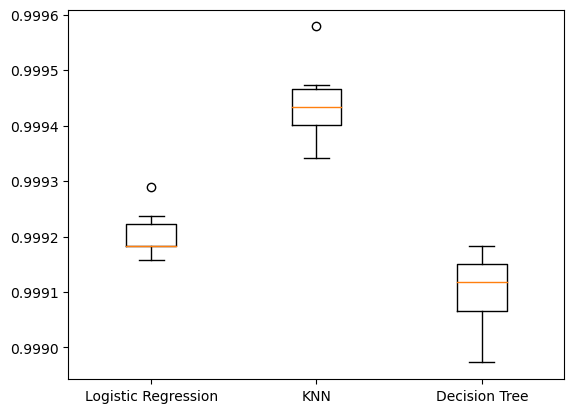

In [51]:
#Let's make the models
models = {"Logistic Regression": LogisticRegression(), "KNN": KNeighborsClassifier(), "Decision Tree": DecisionTreeClassifier()}
results = []
for model in models.values():
  kf = KFold(n_splits=6, random_state= SEED, shuffle=True)
  cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)
  results.append(cv_results)

plt.boxplot(results, labels=models.keys())
plt.show()

In [52]:
#Test set performance
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    test_score = model.score(X_test_scaled, y_test)
    print("{} Test Set Accuracy: {}".format(name, test_score))

Logistic Regression Test Set Accuracy: 0.9991222218320986
KNN Test Set Accuracy: 0.9995259997893332
Decision Tree Test Set Accuracy: 0.9991046662687406
